In [1]:
import numpy as np
import sobol_seq
import vorostereology as vs
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d as m3
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.spatial import Voronoi, voronoi_plot_2d
import voroplusplus as vpp
import pyvoro
from scipy import ndimage
import pandas as pd
import csv


In [15]:
# ######################################## Define/ initialize points##############################################
s = np.random.default_rng().uniform(0,10,size=(1000,3))


In [16]:
s10=s/10

In [17]:
#######Generate 3D Voronoi###########
pycells=pyvoro.compute_voronoi(
s, # point positions
[[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]], # limits
10.0, # block size
# particle radii -- optional, and keyword-compatible arg.
)

In [18]:
pycells10=pyvoro.compute_voronoi(
s10, # point positions
[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]], # limits
1.0, # block size
# particle radii -- optional, and keyword-compatible arg.
)

In [19]:
######Taking 9 cross-sections#####
coeffs =  np.array([5.0, 0.0, 0.0])
r1=np.arange(3.0, 7.0, 0.5).tolist()
cross_section_tot=[vs.compute_cross_section(pycells, coeffs, np.array([2.5, 5.0, 10.0]))]
for x in range(0,8):
 cross_section_tot+= [vs.compute_cross_section(pycells, coeffs, np.array([r1[x], 5.0, 10.0]))]
 

In [20]:
coeffs10 = np.array([0.5, 0.0, 0.0])
r1=np.arange(0.3, 0.7, 0.05).tolist()
cross_section_tot10=[vs.compute_cross_section(pycells10, coeffs10, np.array([0.25, 0.5, 1.0]))]
for x in range(0,8):
 cross_section_tot10+= [vs.compute_cross_section(pycells10, coeffs10, np.array([r1[x], 0.5, 1.0]))]
 

In [21]:
#####Taking the centroid of the visible grains in the cross-sections and create data-set#####
x = [p[0] for p in cross_section_tot[0]['2d'][0]]
y = [p[1] for p in cross_section_tot[0]['2d'][0]]
centroid0=[(sum(x) / len(cross_section_tot[0]['2d'][0]), sum(y) / len(cross_section_tot[0]['2d'][0]))]
for i in range(1,len(cross_section_tot[0]['2d'])):
     x = [p[0] for p in cross_section_tot[0]['2d'][i]]
     y = [p[1] for p in cross_section_tot[0]['2d'][i]]
     centroid0.append((sum(x) / len(cross_section_tot[0]['2d'][i]), sum(y) / len(cross_section_tot[0]['2d'][i])))
id_sec=pd.DataFrame([0.1]*len(cross_section_tot[0]['2d']),columns=['id_sec'])
id_grains=pd.DataFrame(cross_section_tot[0]['original_indices'],columns=['id_grain'])
grain_area=pd.DataFrame(cross_section_tot[0]['areas'],columns=['g_area'])
df0=pd.DataFrame(centroid0,columns=['x','y'])
df0=pd.concat([df0.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
for j in range(1,8):
    x = [p[0] for p in cross_section_tot[j]['2d'][0]]
    y = [p[1] for p in cross_section_tot[j]['2d'][0]]
    centroidj=[(sum(x) / len(cross_section_tot[j]['2d'][0]), sum(y) / len(cross_section_tot[j]['2d'][0]))]
    for i in range(1,len(cross_section_tot[j]['2d'])):
        x = [p[0] for p in cross_section_tot[j]['2d'][i]]
        y = [p[1] for p in cross_section_tot[j]['2d'][i]]   
        centroidj.append((sum(x) / len(cross_section_tot[j]['2d'][i]), sum(y) / len(cross_section_tot[j]['2d'][i])))
    id_sec=pd.DataFrame([(j+1)*0.1]*len(cross_section_tot[j]['2d']),columns=['id_sec'])
    id_grains=pd.DataFrame(cross_section_tot[j]['original_indices'],columns=['id_grain'])
    grain_area=pd.DataFrame(cross_section_tot[j]['areas'],columns=['g_area'])
    dfj=pd.DataFrame(centroidj,columns=['x','y'])
    dfj=pd.concat([dfj.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
    dfj_tot=pd.concat([df0,dfj])
    df0=dfj_tot   



In [22]:
df0.to_csv('dfprova1.csv')

In [23]:
x10 = [p[0] for p in cross_section_tot10[0]['2d'][0]]
y10 = [p[1] for p in cross_section_tot10[0]['2d'][0]]
centroid010=[(sum(x10) / len(cross_section_tot10[0]['2d'][0]), sum(y10) / len(cross_section_tot10[0]['2d'][0]))]
for i in range(1,len(cross_section_tot[0]['2d'])):
     x10 = [p[0] for p in cross_section_tot10[0]['2d'][i]]
     y10 = [p[1] for p in cross_section_tot10[0]['2d'][i]]
     centroid010.append((sum(x10) / len(cross_section_tot10[0]['2d'][i]), sum(y10) / len(cross_section_tot10[0]['2d'][i])))
id_sec10=pd.DataFrame([0.1]*len(cross_section_tot10[0]['2d']),columns=['id_sec'])
id_grains10=pd.DataFrame(cross_section_tot10[0]['original_indices'],columns=['id_grain'])
grain_area10=pd.DataFrame(cross_section_tot10[0]['areas'],columns=['g_area'])
df010=pd.DataFrame(centroid010,columns=['x','y'])
df010=pd.concat([df010.reset_index(drop=True), id_sec10, id_grains10,grain_area10], axis=1)
for j in range(1,8):
    x10 = [p[0] for p in cross_section_tot10[j]['2d'][0]]
    y10 = [p[1] for p in cross_section_tot10[j]['2d'][0]]
    centroidj10=[(sum(x10) / len(cross_section_tot10[j]['2d'][0]), sum(y10) / len(cross_section_tot10[j]['2d'][0]))]
    for i in range(1,len(cross_section_tot10[j]['2d'])):
        x10 = [p[0] for p in cross_section_tot10[j]['2d'][i]]
        y10 = [p[1] for p in cross_section_tot10[j]['2d'][i]]   
        centroidj10.append((sum(x10) / len(cross_section_tot10[j]['2d'][i]), sum(y10) / len(cross_section_tot10[j]['2d'][i])))
    id_sec10=pd.DataFrame([(j+1)*0.1]*len(cross_section_tot10[j]['2d']),columns=['id_sec'])
    id_grains10=pd.DataFrame(cross_section_tot10[j]['original_indices'],columns=['id_grain'])
    grain_area10=pd.DataFrame(cross_section_tot10[j]['areas'],columns=['g_area'])
    dfj10=pd.DataFrame(centroidj10,columns=['x','y'])
    dfj10=pd.concat([dfj10.reset_index(drop=True), id_sec10, id_grains10,grain_area10], axis=1)
    dfj_tot10=pd.concat([df010,dfj10])
    df010=dfj_tot10   



In [24]:
df010.to_csv('dfprova10.csv')

AttributeError: 'Axes3D' object has no attribute 'set_box_aspect'

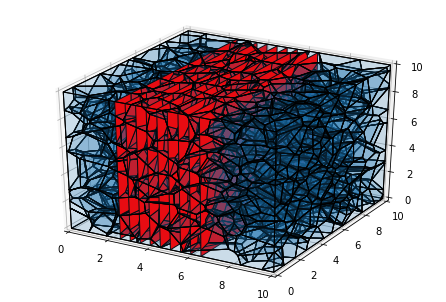

In [25]:
domain = [[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]] 
fig = plt.figure()
ax = Axes3D(fig)

for cell_idx, cell in enumerate(pycells):
    for facet_idx, facet in enumerate(cell['faces']):
        idx = np.array(facet['vertices'])
        polygon = m3.art3d.Poly3DCollection([np.array(cell['vertices'])[idx]])
        polygon.set_edgecolor('k')
        polygon.set_alpha(0.1)
        ax.add_collection3d(polygon)

for x in range(0, 9, 1):
    for cell in cross_section_tot[x]['3d']:
        polygon = m3.art3d.Poly3DCollection([cell])
        polygon.set_color("red")
        polygon.set_edgecolor('k')
        ax.add_collection3d(polygon)

    
ax.set_xlim3d(domain[0])
ax.set_ylim3d(domain[1])
ax.set_zlim3d(domain[2])
ax.set_box_aspect((1, 1, 1))
ax.set_axis_off()
plt.show(block=False)



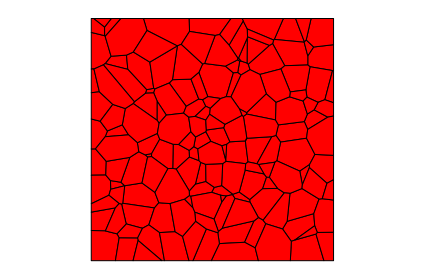

In [26]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

coll = PolyCollection(cross_section_tot[0]['2d'], facecolors="red", edgecolors='k')
ax2.add_collection(coll)
ax2.axis("equal")
ax2.set_axis_off()
fig2.tight_layout()
plt.show()




AttributeError: 'Axes3D' object has no attribute 'set_box_aspect'

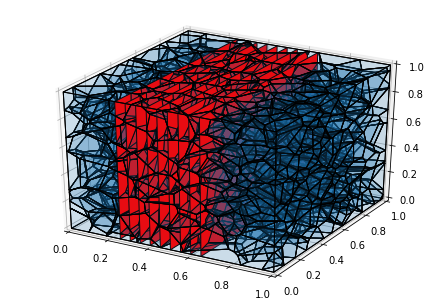

In [27]:
domain = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]] 
fig = plt.figure()
ax = Axes3D(fig)

for cell_idx, cell in enumerate(pycells10):
    for facet_idx, facet in enumerate(cell['faces']):
        idx = np.array(facet['vertices'])
        polygon = m3.art3d.Poly3DCollection([np.array(cell['vertices'])[idx]])
        polygon.set_edgecolor('k')
        polygon.set_alpha(0.1)
        ax.add_collection3d(polygon)


for x in range(0, 9, 1):
    for cell in cross_section_tot10[x]['3d']:
        polygon = m3.art3d.Poly3DCollection([cell])
        polygon.set_color("red")
        polygon.set_edgecolor('k')
        ax.add_collection3d(polygon)
    
ax.set_xlim3d(domain[0])
ax.set_ylim3d(domain[1])
ax.set_zlim3d(domain[2])
ax.set_box_aspect((1, 1, 1))
ax.set_axis_off()
plt.show(block=False)




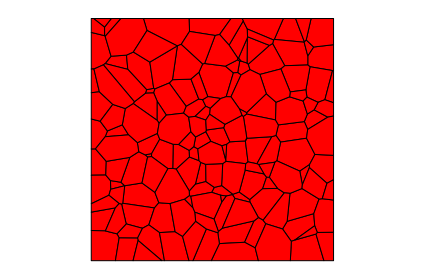

In [28]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

coll = PolyCollection(cross_section_tot10[0]['2d'], facecolors="red", edgecolors='k')
ax2.add_collection(coll)
ax2.axis("equal")
ax2.set_axis_off()
fig2.tight_layout()
plt.show()

In [1]:
dfx_tot.to_csv('dftotvor1.csv')

NameError: name 'dfx_tot' is not defined

In [2]:
#########Generazione multipla######
dfj_tot_tot=pd.DataFrame(columns=['x','y','id_sec','id_grain','g_area','id_vor'])
for k in range(1,100):
    s = np.random.default_rng().uniform(0,10,size=(100,3))
    pycells=pyvoro.compute_voronoi(
    s, [[0.0, 10.0], [0.0, 10.0], [0.0, 10.0]], 1000.0,)
    coeffs = np.array([5.0, 0.0, 0.0])
    r1=np.arange(0.2, 1, 0.1).tolist()
    cross_section_tot=[vs.compute_cross_section(pycells, coeffs, np.array([0.1+5.0, 5.0, 10.0]))]
    for x in range(0,8):
     cross_section_tot+= [vs.compute_cross_section(pycells, coeffs, np.array([r1[x]+5.0, 5.0, 10.0]))]
    x = [p[0] for p in cross_section_tot[0]['2d'][0]]
    y = [p[1] for p in cross_section_tot[0]['2d'][0]]
    centroid0=[(sum(x) / len(cross_section_tot[0]['2d'][0]), sum(y) / len(cross_section_tot[0]['2d'][0]))]
    for i in range(1,len(cross_section_tot[0]['2d'])):
         x = [p[0] for p in cross_section_tot[0]['2d'][i]]
         y = [p[1] for p in cross_section_tot[0]['2d'][i]]
         centroid0.append((sum(x) / len(cross_section_tot[0]['2d'][i]), sum(y) / len(cross_section_tot[0]['2d'][i])))
    id_sec=pd.DataFrame([0.1]*len(cross_section_tot[0]['2d']),columns=['id_sec'])
    id_grains=pd.DataFrame(cross_section_tot[0]['original_indices'],columns=['id_grain'])
    grain_area=pd.DataFrame(cross_section_tot[0]['areas'],columns=['g_area'])
    df0=pd.DataFrame(centroid0,columns=['x','y'])
    df0=pd.concat([df0.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
    for j in range(1,8):
        x = [p[0] for p in cross_section_tot[j]['2d'][0]]
        y = [p[1] for p in cross_section_tot[j]['2d'][0]]
        centroidj=[(sum(x) / len(cross_section_tot[j]['2d'][0]), sum(y) / len(cross_section_tot[j]['2d'][0]))]
        for i in range(1,len(cross_section_tot[j]['2d'])):
            x = [p[0] for p in cross_section_tot[j]['2d'][i]]
            y = [p[1] for p in cross_section_tot[j]['2d'][i]]   
            centroidj.append((sum(x) / len(cross_section_tot[j]['2d'][i]), sum(y) / len(cross_section_tot[j]['2d'][i])))
        id_sec=pd.DataFrame([(j+1)*0.1]*len(cross_section_tot[j]['2d']),columns=['id_sec'])
        id_grains=pd.DataFrame(cross_section_tot[j]['original_indices'],columns=['id_grain'])
        grain_area=pd.DataFrame(cross_section_tot[j]['areas'],columns=['g_area'])
        dfj=pd.DataFrame(centroidj,columns=['x','y'])
        dfj=pd.concat([dfj.reset_index(drop=True), id_sec, id_grains,grain_area], axis=1)
        dfj_tot=pd.concat([df0,dfj])
        df0=dfj_tot   
    id_vor=pd.DataFrame([k]*dfj_tot.shape[0],columns=['id_vor'])
    dfj_tot=pd.concat([dfj_tot.reset_index(drop=True), id_vor], axis=1)   
    dfj_tot=pd.concat([dfj_tot ,dfj_tot_tot])
    dfj_tot_tot=dfj_tot 
    


NameError: name 'pd' is not defined